In [2]:
from PointerNet import PtrNet, Critic
from tsp_data import Tsp
import torch

import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import torch.optim as optim

import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
print(device)

cuda


In [4]:
# Initialize model
hidden_dim = 256
model = PtrNet(hidden_dim=hidden_dim).to(device)

In [5]:
model.load_state_dict(torch.load('tsp_100_model_weigths.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

In [6]:
tsp = Tsp(N=45)
x,_ = tsp.next_batch(1)

In [7]:
x.size()

torch.Size([1, 45, 2])

In [8]:
x.type

<function Tensor.type>

In [22]:
x

tensor([[[6.1728, 5.6037],
         [6.5950, 6.2692],
         [1.2886, 8.6442],
         [1.1040, 5.2663],
         [4.0124, 8.8548],
         [2.8208, 0.9884],
         [6.6448, 7.2345],
         [8.6390, 8.1185],
         [9.3024, 3.0919],
         [9.9351, 8.6445],
         [4.6162, 6.7083],
         [1.6791, 5.2052],
         [9.1174, 9.0473],
         [7.8762, 9.5947],
         [0.0813, 1.7550],
         [1.1363, 1.3831],
         [3.0227, 3.9908],
         [9.9372, 0.1854],
         [5.7092, 8.9784],
         [4.2332, 4.8364],
         [7.3640, 1.7085],
         [1.2329, 4.8945],
         [0.1589, 3.3867],
         [7.3773, 2.9646],
         [3.3451, 4.4842],
         [0.0885, 5.6724],
         [9.7000, 4.2436],
         [3.0049, 9.0180],
         [8.2332, 2.2941],
         [2.4145, 5.4965],
         [0.8194, 0.7185],
         [6.4880, 6.7802],
         [2.8814, 7.0271],
         [2.6086, 3.9385],
         [1.6539, 6.4282],
         [4.5541, 2.2875],
         [5.9731, 4.5438],
 

In [8]:
_,sol = model(x.to(device))

In [21]:
sol

tensor([[ 0.,  1., 31.,  6., 44., 38.,  7.,  9., 12., 13., 18.,  4., 27.,  2.,
         32., 34., 42., 25.,  3., 11., 21., 40., 22., 14., 30., 15.,  5., 39.,
         37., 35., 33., 16., 24., 29., 10., 19., 36., 23., 20., 43., 17., 28.,
          8., 26., 41.]])

In [16]:
def plot_tsp_solution(coords, tour):
    """
    coords: (num_cities, 2) - 각 도시의 좌표
    tour: (num_cities,) - 선택된 도시의 인덱스로 구성된 투어
    """
    num_cities = len(coords)
    
    # 경로 좌표 추출
    path_coords = [coords[int(i)] for i in tour]
    
    # 경로를 닫힌 형태로 만들기 위해 시작 도시를 경로에 추가
    path_coords.append(coords[int(tour[0].item())])
    
    # 좌표 추출
    path_x = [coord[0].item() for coord in path_coords]
    path_y = [coord[1].item() for coord in path_coords]
    
    # 그래프 그리기
    plt.figure(figsize=(6, 6))
    plt.plot(path_x, path_y, 'o-')
    plt.scatter(path_x[0], path_y[0], marker='s', color='red', label='Start')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Solution')
    plt.legend()
    plt.grid(True)
    plt.show()

In [17]:
sol[0]

tensor([ 0.,  1., 31.,  6., 44., 38.,  7.,  9., 12., 13., 18.,  4., 27.,  2.,
        32., 34., 42., 25.,  3., 11., 21., 40., 22., 14., 30., 15.,  5., 39.,
        37., 35., 33., 16., 24., 29., 10., 19., 36., 23., 20., 43., 17., 28.,
         8., 26., 41.])

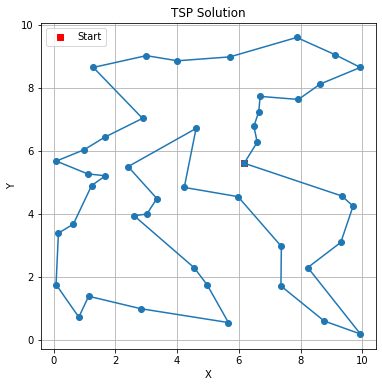

In [18]:
plot_tsp_solution(x[0],sol[0])

# 우리문제

In [1]:
#pip install torch torchvision

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d6/a8/43e5033f9b2f727c158456e0720f870030ad3685c46f41ca3ca901b54922/torch-2.1.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/13/24/23cdf7e7dc33e5c01588c315f8424d31afa9edb05a80168f3d44f7178ff7/torchvision-0.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44b99fe728ed912106fc781/filelock-3.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/24/21/7d397a4b7934ff4028987914ac1044d3b7d52712f30e2ac7a2ae5bc86dd0/typing_extensions-4.8.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     ---------------------------------------- 0.1/5.7 MB 1.7 MB/s eta 0:00:04
     --- 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\민지영\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
